In [1]:
#importing libraries for pandas, numpy
import pandas as pd
import numpy as np

#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data=pd.read_csv('Japan_used_cars_datasets.csv')
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
#chacking for dataset shape
data.shape

(2318, 11)

Observation:
- The dataset has 2318 rows and 11 columns.    

In [4]:
#checking for null values
data.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

Observation:
- There are no null values in dataset

In [5]:
data.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

Observation:
- This shows list of columns(features). 'price' column is dependant variable i.e. label. 

In [6]:
#checking for suplicate entries in dataset
data.duplicated().sum()

0

Observation:
- There are no duplicate entries in dataset.

In [7]:
#checking for unique values in mark(brand) column
data['mark'].unique()
print(data['mark'].value_counts())

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64


Observation:
- There are total of 28 car makes listed in dataset.
- Most number of cars for resale are of Toyota make.

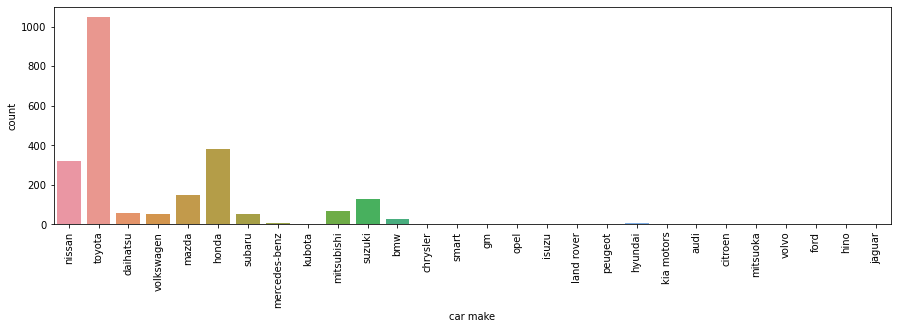

In [8]:
plt.figure(figsize=(15,4))
sns.countplot(data['mark'])
plt.xticks(rotation='vertical')
plt.xlabel('car make')
plt.show()

Observation:
- As seen above in plot Toyota cars are more in  number for sale followed by Honda and Nissan.


Car fuel types gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64


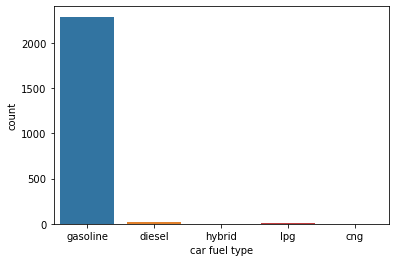

In [9]:
print('Car fuel types',data['fuel'].value_counts())

sns.countplot(data['fuel'])
plt.xlabel('car fuel type')
plt.show()

Observation:
- as seen in above plot, most cars for resale runs on gasoline while very small amount of car runs on other fuels compared to gasoline.
-  There are only 10 cars that uses fuel other than gasoline and diesel.

Car transmission type at     2171
mt      117
cvt      30
Name: transmission, dtype: int64


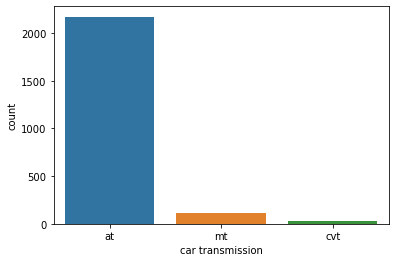

In [10]:
print('Car transmission type',data['transmission'].value_counts())

sns.countplot(data['transmission'])
plt.xlabel('car transmission')
plt.show()

Observation:
- Most of the cars i.e. 2171 cars has  automatic transmission.
- 117 cars has manual transmission while only 30 cars have CVT transmission.

value count for car drive type are 2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


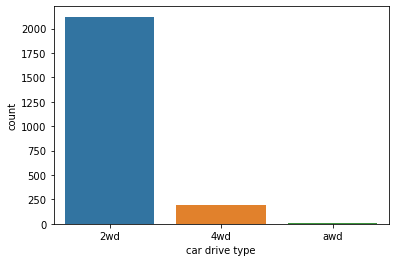

In [11]:
print('value count for car drive type are',data['drive'].value_counts())
sns.countplot(data['drive'])
plt.xlabel('car drive type')
plt.show()

Observation:
- More than 2000 cars for resale are of 2 wheel drive while >100 cars are 4 wheel drives.
- There are some cars which are all wheel drives but are very low in number.

value count for kind of hand drives are rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64


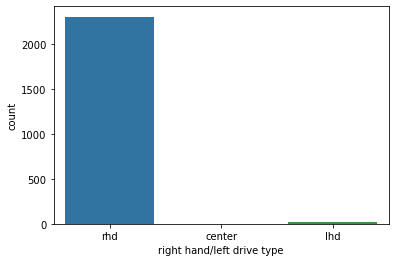

In [12]:
print('value count for kind of hand drives are',data['hand_drive'].value_counts())
      
sns.countplot(data['hand_drive'])
plt.xlabel('right hand/left drive type')
plt.show()

Observation:
- Since Japan follows right hand drive(rhd) cars it is normal to see that there are 2301 cars which are right hand drive.
- There are less number of left hand drive(lhd) cars.
- There is only one car for resale which is driven from center of the car.

In [13]:
#checking cars for resale as per year of manufacture
print('value count for car manufacture year',data['year'].value_counts())

value count for car manufacture year 2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: year, dtype: int64


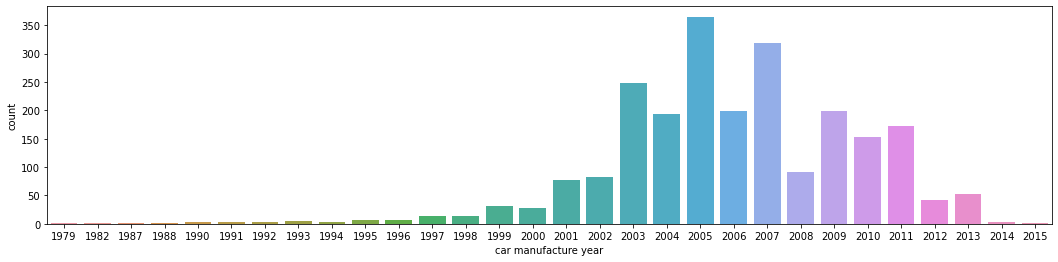

In [14]:
plt.figure(figsize=(18,4))      
sns.countplot(data['year'])
plt.xlabel('car manufacture year')
plt.show()

Observation:
- Most of the cars that are for resale are manufactured in years ranging from 2001 to 2013.
- There are only 5 numbers of newly manufactured cars i.e. in 2014 and 2015.
- There are very less number of cars for resale from years 1979 to 1998. 

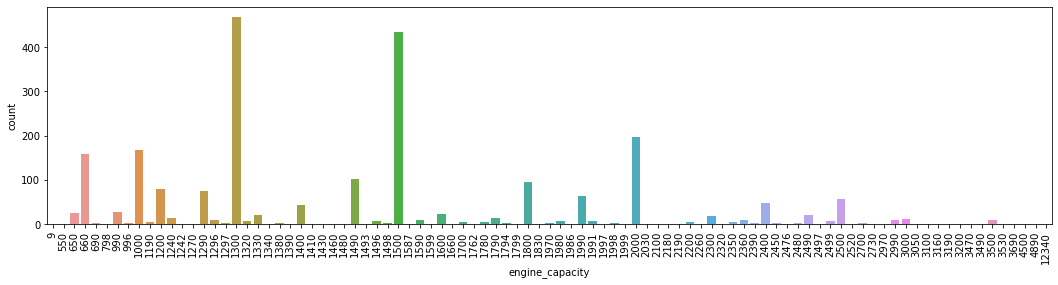

In [15]:
plt.figure(figsize=(18,4))      
sns.countplot(data['engine_capacity'])
plt.xticks(rotation='vertical')
plt.show()

Observation:
- Most cars for resale have engine capacity of 1300cc followed by 1500cc.
- There cannot be a car with 9cc engine so I would have to delete that car data.
- There was no car devloped in the world with 12340 cc engine in 2015(this data is limited to latest by 2015) so I would have to drop them. 


In [16]:
#locating data where engine capacity is 12340cc 
data.loc[data['engine_capacity']==12340]

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2026,2042,1306,suzuki,swift,2009,111055,12340,at,2wd,rhd,gasoline


In [17]:
#locating data where engine capacity is 9cc
data.loc[data['engine_capacity']==9]

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
23,25,300,kubota,kubota others,1979,9999,9,mt,4wd,center,diesel


In [18]:
#dropping row where index no. of data is 23 and saving it

data.drop([23],inplace=True)

Note/Reason:
Since engine capacity is only 9cc which is not possible and I dont know anything about the vehicle hence I've dropped  entire vehicle detail 

In [19]:
# replacing 12340 value with 1200

data['engine_capacity']=data['engine_capacity'].replace(12340,1200)

Note/Reason: since I know that swift vehicle has 1200cc engine capacity so replacing 12340 with 1200

In [20]:
#checking for data
data.iloc[2025]

id                     2042
price                  1306
mark                 suzuki
model                 swift
year                   2009
mileage              111055
engine_capacity        1200
transmission             at
drive                   2wd
hand_drive              rhd
fuel               gasoline
Name: 2026, dtype: object

Observation:
- It can be seen that vehicle engine capacity has been changed to 1200    

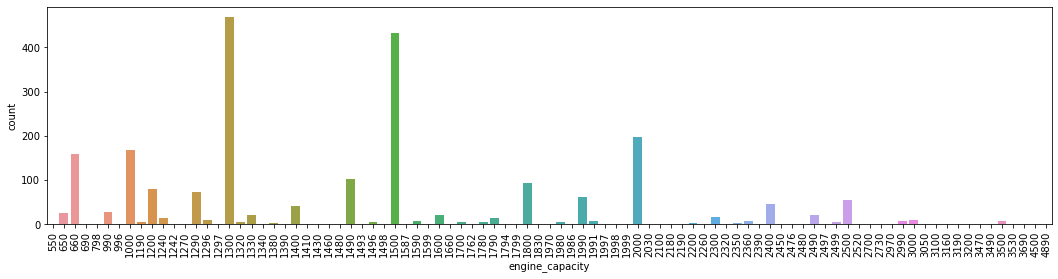

In [21]:
plt.figure(figsize=(18,4))      
sns.countplot(data['engine_capacity'])
plt.xticks(rotation='vertical')
plt.show()

Observation:
- from the graph it can be seen that lowest and highest value of engine capacity has been changed/removed.

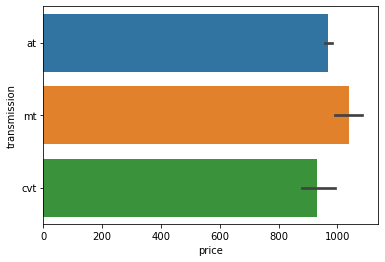

In [22]:
sns.barplot(x='price',y='transmission',data=data)
plt.show()

Observation:
- It can be seen from the graph that cars having manual transmission are priced higher than automatic followed by CVT transmission.

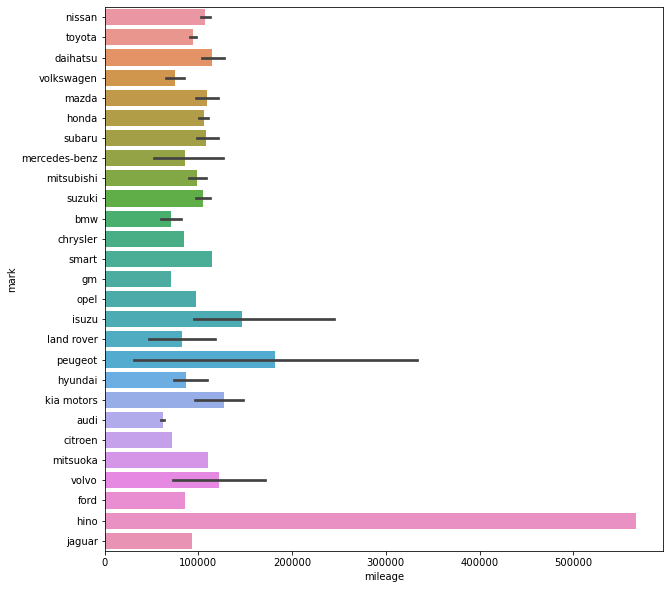

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x='mileage',y='mark',data=data)
plt.show()

Observation:
- The most driven car is from hino make which is approx.> 550000 miles.
- And the least driven  cars for resale are from audi(3nos)
- Cars from peugot (2 nos),isuzu(3 nos),smart(2 nos) are some of the most driven cars.

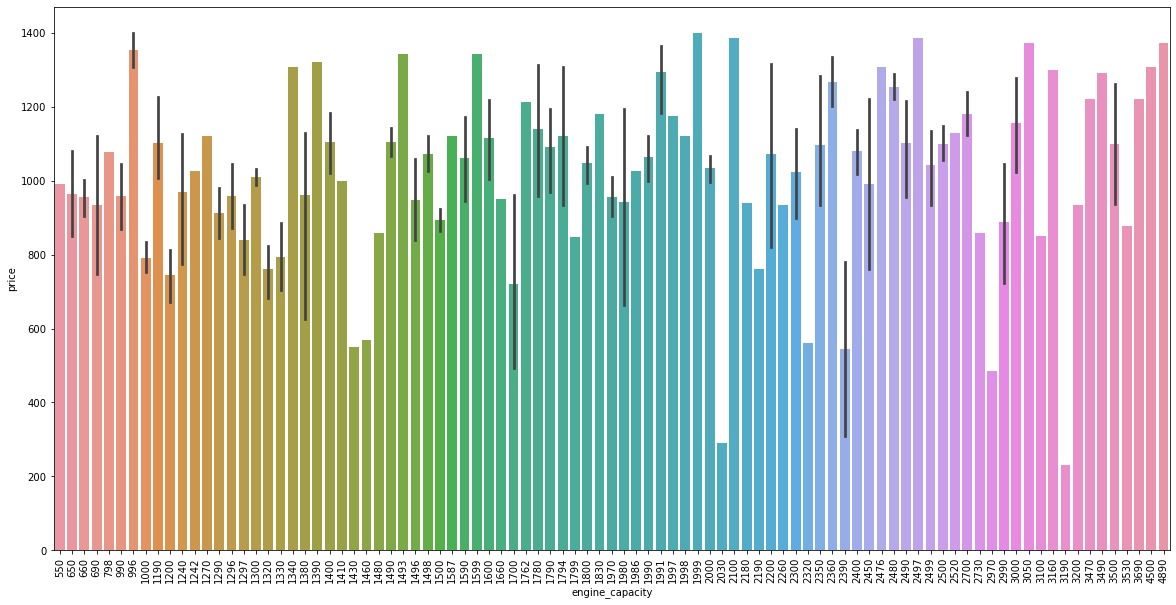

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x='engine_capacity',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Observation:
- The lowest priced car is of 3190cc while the highest priced car is having engine capacity of 1999cc.


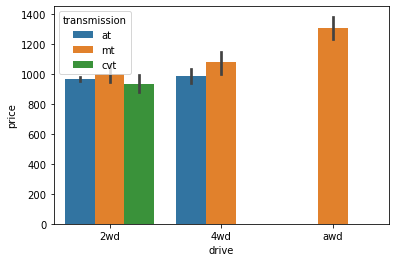

In [25]:

sns.barplot(x='drive',y='price',data=data,hue='transmission')
plt.show()

Observation:
- All wheel drive cars have highest resale price.
- 4 and 2 wheel drive cars have almost same pricing
- all wheel drive there for resale  are only with manual transmission while 4 and all wheel drive cars there does not have CVT transmission.
- In both 2 and 4 wheel drive, cars with manual transmission are priced higher than others. CVT transmission cars are cheapest in case of 2 wheel drive.

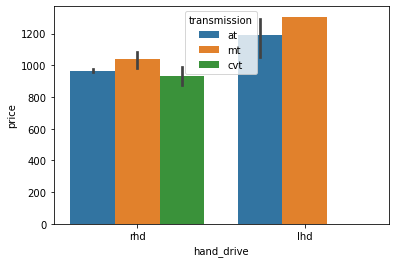

In [26]:
sns.barplot(x='hand_drive',y='price',data=data,hue='transmission')
plt.show()

Observation:
- left hand drive cars are priced higher than right hand drive.
- It can be seen left hand drive cars that are for sale does not have cars with CVT transmission.

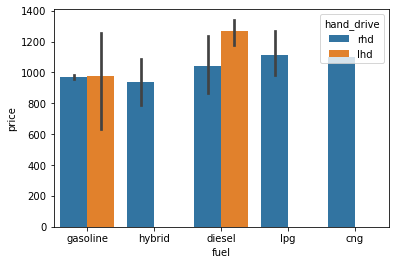

In [27]:
sns.barplot(x='fuel',y='price',data=data,hue='hand_drive')
plt.show()

Observation:
- Diesel cars are priced higher while hybrid cars are priced lower.
- hybrid,cng and lpg cars are all right hand drive cars.
- There is not much of a difference between pricing of gasoline right hand and left hand drive cars.

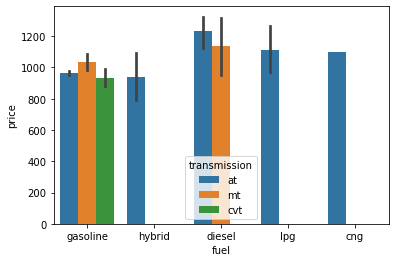

In [28]:
sns.barplot(x='fuel',y='price',data=data,hue='transmission')

plt.show()

Observation:
- It is seen that hybrid, cng and lpg cars only has automatic transmission.
- diesel fuel type cars that are for resale does not have cvt transmission.
- gasoline cars have all kinds of transmision option available.

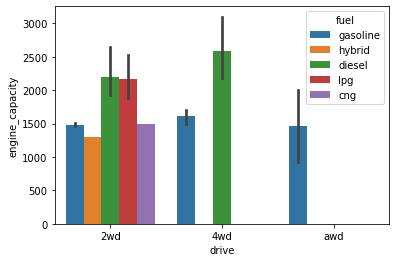

In [29]:
sns.barplot(x='drive',y='engine_capacity',data=data,hue='fuel')

plt.show()

Observation:
- All kinds of fuel types can be found in 2 wheel drive cars.
- 4 wheel drive is limited to only gasoline and diesel fuel type.
- while all wheel cars only have option of gasoline.
- hybrid cars have low engine capacity.
- 4 wheel drive diesel cars have bigger engines than 2 wheel drive diesel cars

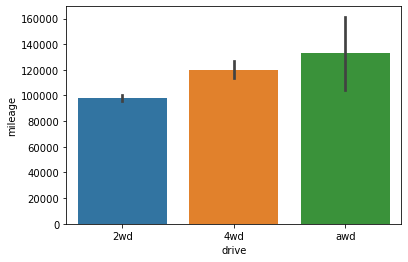

In [30]:
sns.barplot(x='drive',y='mileage',data=data)

plt.show()

Observation:
- AWD cars have put up more mileage than 4 and 2 wheel drive. 2 wheel drive cars have least mileage compared to other types.

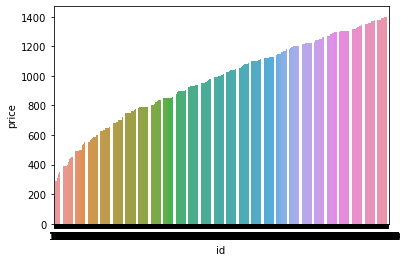

In [46]:
sns.barplot(x='id',y='price',data=data)

plt.show()

Observation:
- The plot shows that as value of id increases prices also increases.    

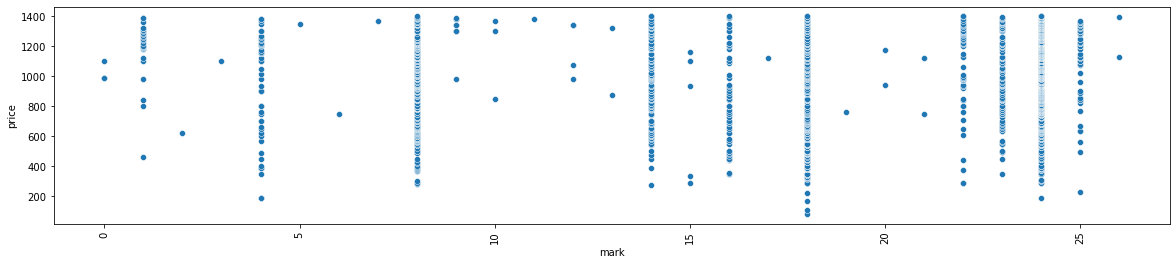

In [47]:
plt.figure(figsize=(20,4))
sns.scatterplot(x='mark',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Observation:
- It can be seen that asian branded cars(nissan, toyota, daihatsu,mazda, honda, subaru, mitsubishi, suzuki)are more in number for resale and hence priced accordingly to their models than abroad brands.
- other than asian countries car brands are less in number for sale but they are priced higher.

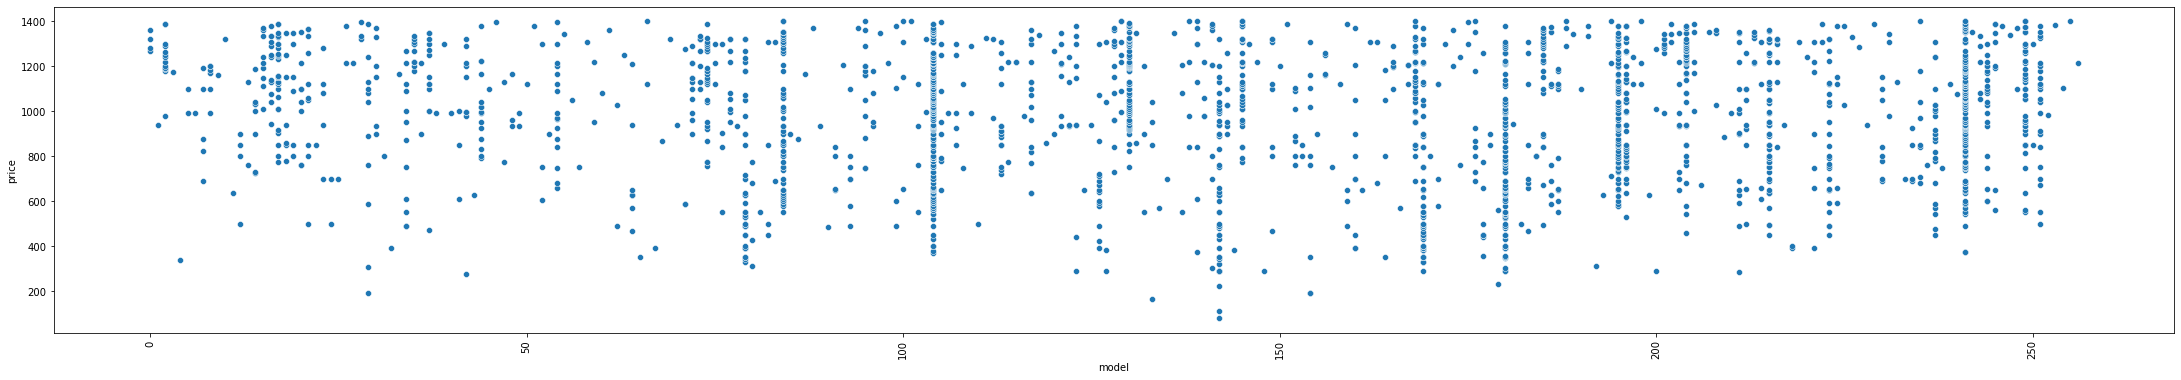

In [48]:
plt.figure(figsize=(38,6))
sns.scatterplot(x='model',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Observation:
- The above plot shows the model name and quantity with respect to price that is kept for resale.
- The cheapest car that is available for resale is 'march'.

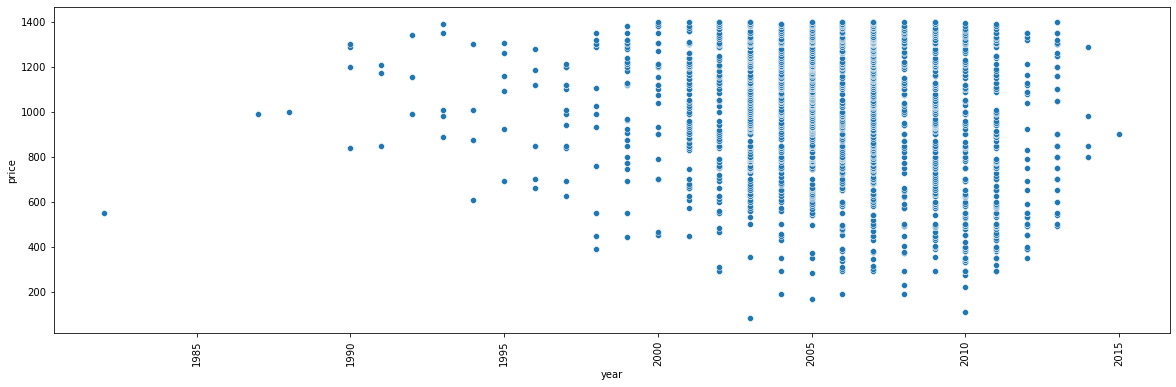

In [49]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='year',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Observation:
- The above plot shows prices of cars that are for sales based    on their years.
- Though there is relatiosnhip between year and prices, seeing this plot I cannot establish the kind as many other factors are involved in it.

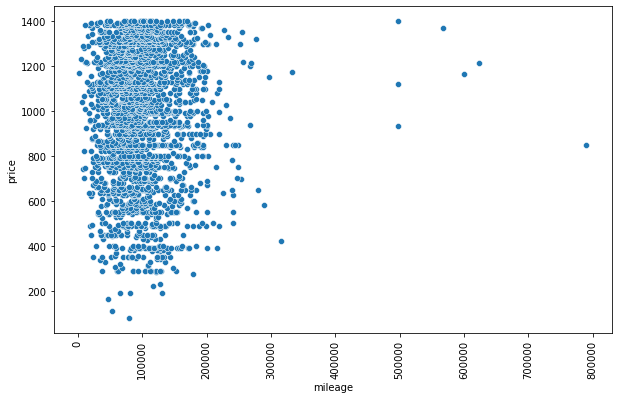

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage',y='price',data=data)
plt.xticks(rotation='vertical')
plt.show()

Observation:
- The avbove plot shows relation between mileage and prices showing that even though price is increasing,mileage is increaing for only some cars indicating that other factors are also responsible for car price.

# Encoding the categorical columns using label encoder

In [51]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [52]:
#applying label encoder to specified columns

df1=label_enc.fit_transform(data['mark'])
df2=label_enc.fit_transform(data['model'])
df3=label_enc.fit_transform(data['transmission'])
df4=label_enc.fit_transform(data['drive'])
df5=label_enc.fit_transform(data['hand_drive'])
df6=label_enc.fit_transform(data['fuel'])


In [53]:
#saving encoded data to their respctive columns

data['mark']=df1
data['model']=df2
data['transmission']=df3
data['drive']=df4
data['hand_drive']=df5
data['fuel']=df6

In [66]:
#checking of data is encoded by printing dataframe

data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,18,142,-0.848102,-0.275578,-0.452368,0,0,1,2
1,1,110,18,142,1.133418,-1.004189,-0.546223,0,0,1,2
2,2,165,18,133,-0.314002,-1.175444,1.023094,0,0,1,2
3,3,190,24,29,0.534494,0.733817,1.006530,0,0,1,2
4,4,190,4,154,-0.037625,-0.620404,-2.108765,0,0,1,2


# Describing the dataset

In [67]:
data.describe()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2317.000000,2317.000000,2317.000000,2317.000000,2.317000e+03,2.317000e+03,2.317000e+03,2317.000000,2317.000000,2317.000000,2317.000000
mean,1169.540785,971.812257,18.626241,147.340958,-1.270767e-15,-1.092566e-15,2.717627e-15,0.113077,0.086750,0.993095,1.998705
std,674.187146,288.397912,6.771764,68.154461,1.000216e+00,1.000216e+00,1.000216e+00,0.447780,0.289096,0.082830,0.148388
min,0.000000,80.000000,0.000000,0.000000,-5.193464e+00,-4.295101e+00,-2.533417e+00,0.000000,0.000000,0.000000,0.000000
25%,584.000000,779.000000,14.000000,104.000000,-5.841144e-01,-6.016879e-01,-3.155226e-01,0.000000,0.000000,1.000000,2.000000
50%,1169.000000,1000.000000,23.000000,145.000000,-3.762466e-02,3.820191e-02,9.029119e-02,0.000000,0.000000,1.000000,2.000000
75%,1754.000000,1213.000000,24.000000,203.000000,8.305300e-01,6.181233e-01,6.799797e-01,0.000000,0.000000,1.000000,2.000000
max,2335.000000,1400.000000,26.000000,256.000000,2.756182e+00,6.233016e+00,4.401153e+00,2.000000,2.000000,1.000000,4.000000


Observations:
- 'id' is continuous data with max id values as 2335 and lowest being 0. 
- 'Price' is dependant variable(continuous) column. The highest priced car in this dataset is valued at 1400 units while lowest priced car is valued at 80 units. The average prices of car are in the range of 969.25 units.
- Max engine capacity  car is with  4890cc while lowest  Engine capacity car is with 550cc.
- Years describes the manufacturing year of the car. The oldest car present in this dataset is from year 1980 while latest of from the year 2015. Most cars are in the range of year 2005.
- Mileage is also continuous data with describing no. of miles car has been driven. The most driven car has mileage of 790000 miles while least driven car is with mileage of 2000 miles.

# Checking for skewness in continuous data

In [68]:
#checking for values of skewness 
data.skew()

id                 -0.002367
price              -0.465882
mark               -0.910181
model              -0.267879
year               -0.300349
mileage             0.099712
engine_capacity     0.019504
transmission        3.836775
drive               3.203582
hand_drive        -11.916513
fuel                4.390882
dtype: float64

Observation:
- It can be seen that for year, mileage and engine_capacity; the value of skewness is >+- 0.5, hence we need to apply power transformer to reduce its skewness.

In [69]:
# confirming the skewness with displot for mileage, year and engine_capacity

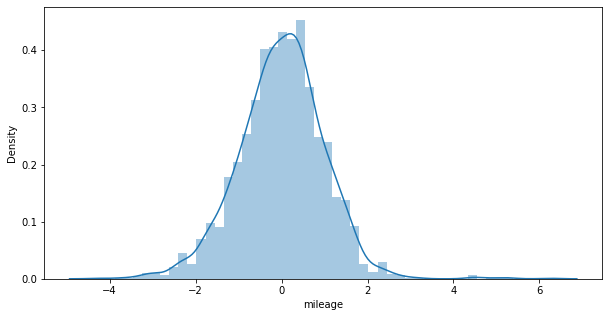

In [70]:
plt.figure(figsize=(10,5))
sns.distplot(data['mileage'])
plt.show()

Observation:
- Most of the data shows bell shaped curve but some data is rightly skewed.    

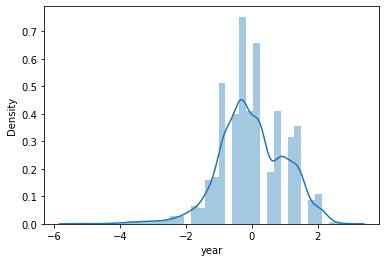

In [71]:
sns.distplot(data['year'])
plt.show()

Observation:
- as seen in plot the data is highly skewed in left side.

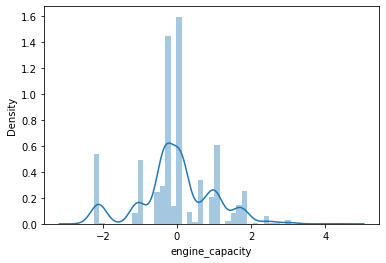

In [72]:
sns.distplot(data['engine_capacity'])
plt.show()

Observation:
- as seen in plot the data is highly skewed with several bell shaped curves.

# Applying power transformer to remove skewness

In [73]:
#importing libraries for power transformer and Standard Scaler

from sklearn.preprocessing import StandardScaler,PowerTransformer


features=['mileage','year','engine_capacity'] #selecting features that need to be transformed

scaler=PowerTransformer(method='yeo-johnson')#using yeo-johnson to transform/remove skewness

data[features]=scaler.fit_transform(data[features])

In [74]:
#checking for values of skewness after applying power transformer method 
data.skew()

id                 -0.002367
price              -0.465882
mark               -0.910181
model              -0.267879
year               -0.089496
mileage             0.089720
engine_capacity    -0.005305
transmission        3.836775
drive               3.203582
hand_drive        -11.916513
fuel                4.390882
dtype: float64

Observation:
It can be seen that values for year, mileage and engine_capacity have been reduced are within range of +- 0.5.

<AxesSubplot:xlabel='year'>

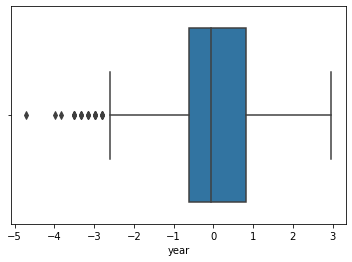

In [75]:
sns.boxplot(data['year'])

<AxesSubplot:xlabel='mileage'>

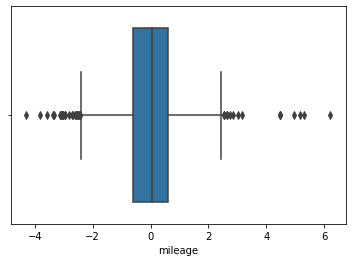

In [76]:
sns.boxplot(data['mileage'])

<AxesSubplot:xlabel='engine_capacity'>

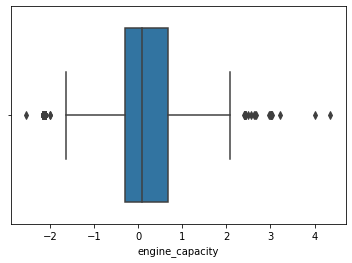

In [77]:
sns.boxplot(data['engine_capacity'])

Observation:
- In all the above 3 columns it can be seen, all have outliers which needs to be removed.    

# Removal of outliers from years, engine_capacity and mileage columns using z-score method

In [78]:
#importing library
from scipy.stats import zscore

z_score=zscore(data[['year','mileage','engine_capacity']])

In [79]:
abs_z_score=np.abs(z_score)

In [80]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [82]:
data=data[filtering_entry]

In [83]:
data.shape

(2272, 11)

Observation
- (2318,11) was the original shape of the dataset, then 'id' column and 1 row was dropped so making it (2317,10)

# data loss after removing outliers

In [84]:
# data loss percentage 
data_loss=((2318-2272)/2318)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 1.984469370146678%


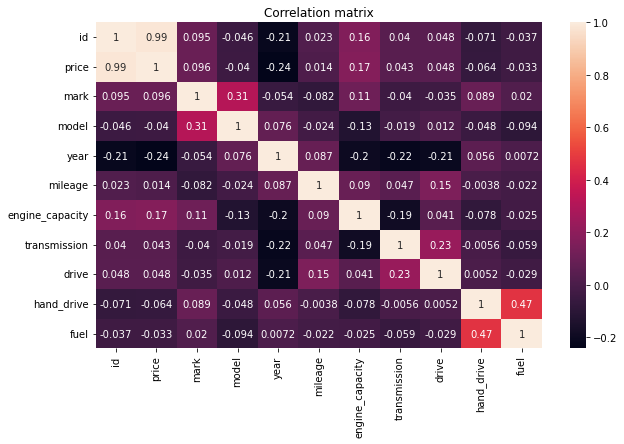

In [85]:
#finding correlation within dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

Observation:
- There is no major correlation with respect to price.
- hand_drive is related fuel for >47%.
- drive is related with transmission and mileage.
- id is related with price for 99%.



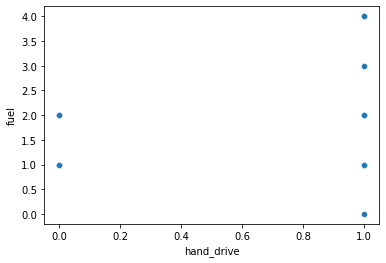

In [521]:
#since as per heatmap handdrive is related to fuel, plotting scatter plot to confirm
sns.scatterplot(x='hand_drive',y='fuel',data=data)
plt.show()

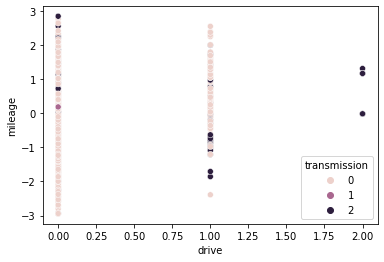

In [522]:
#since as per heatmap handdrive is related to fuel, plotting scatter plot to confirm
sns.scatterplot(x='drive',y='mileage',data=data,hue='transmission')
plt.show()

Observation:
- From both the plots above I cannot find coorelation or correlation is not clear according to me.    

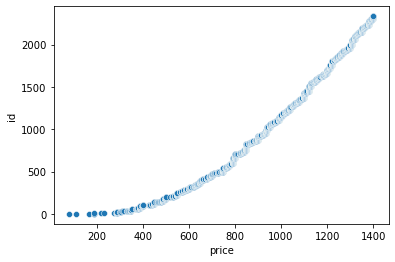

In [86]:
#plotting scatterplot to confirm price and id
sns.scatterplot(x='price',y='id',data=data)
plt.show()

Observation:
- It shows good positive trend.

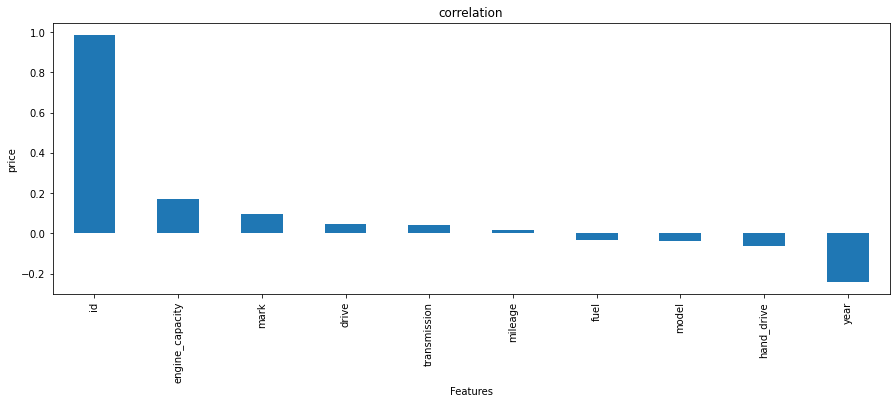

In [87]:
# As I cannot devise a relationship within dataset, plotting correlation of features with respect to label.
plt.figure(figsize=(15,5))
data.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('price')
plt.title('correlation')
plt.show()

Observation:
- It looks like that year is mostly related(negatively) to price while engine_capacity is positively related to price.
-Least related to price of car is the mileage of the car.
- As seen above id is highest positively related to label.

# Note:
I wont be doing feature selection to find best features that are required to build a model as I think all the features that are provided are important(very/less). Even as per above all the features show less/more correlation with label. Hence moving forward with model building.    

# Model building part

# splitting data into features and label

In [88]:
x=data.drop('price',axis=1)
y=data['price']

In [89]:
print(x) #printing x data

        id  mark  model      year   mileage  engine_capacity  transmission  \
0        0    18    142 -0.856822 -0.274632        -0.449797             0   
1        1    18    142  1.150702 -1.004355        -0.544042             0   
2        2    18    133 -0.343164 -1.176006         1.022476             0   
3        3    24     29  0.515365  0.734207         1.006030             0   
4        4     4    154 -0.070019 -0.619857        -2.119806             0   
...    ...   ...    ...       ...       ...              ...           ...   
2313  2331    24    241  0.826978  0.565310        -1.063743             0   
2314  2332    24    100 -0.856822  0.184491         2.431489             0   
2315  2333    22    194 -0.343164  0.184491        -2.119806             1   
2316  2334     8    255 -1.561647  1.346427        -2.119806             0   
2317  2335    24    101 -0.343164 -0.462777         2.431489             0   

      drive  hand_drive  fuel  
0         0           1     2  

In [90]:
print(y) #printing y data

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2272, dtype: int64


#  Initiating train test split

In [91]:
#importing library for regression model
from sklearn.linear_model import LinearRegression

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [92]:
#assigning variable lr for linear regression model

lr=LinearRegression()

In [95]:
# finding best random state for 
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)

training score is  97.22443643790821  for random state  0
testing score is  96.94504950729153  for random state  0
training score is  97.0904022584815  for random state  1
testing score is  97.34893552094569  for random state  1
training score is  97.04601995386398  for random state  2
testing score is  97.4766020217062  for random state  2
training score is  97.13970678264275  for random state  3
testing score is  97.18903070299027  for random state  3
training score is  97.02562912042312  for random state  4
testing score is  97.52431667301013  for random state  4
training score is  97.17873186902536  for random state  5
testing score is  97.08122282625658  for random state  5
training score is  97.22813910291907  for random state  6
testing score is  96.91042117213897  for random state  6
training score is  97.1427983168141  for random state  7
testing score is  97.18598994461057  for random state  7
training score is  96.98765679092487  for random state  8
testing score is  97.6901

In [100]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [101]:
#training the model

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=lr.predict(x_train) 

pred=lr.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:97.22%
testing R2 score:96.95%


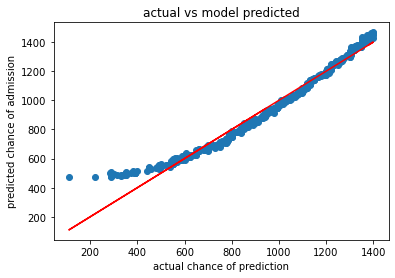

In [103]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual chance of prediction')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 36.501733379973295
root mean squared error 51.231981962545824


# Checking if the model is overfitted or not hence applying LASSO and RIDGE regularization methods

In [106]:
#importing necessary library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# LASSO CV

In [107]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True) #finding learning rate

#LASSOCV getting trained on training data
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [108]:
#using learning rate the model learnt and gave alpha value
alpha=lasscv.alpha_
alpha

0.02582786276985059

In [109]:
#using Lasso regression with best alpha value provided

lasso_reg=Lasso(alpha)

#Training model with lasso regression
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.02582786276985059)

In [110]:
#printing Lasso regression score 

print('Lasso CV score for training data',(lasso_reg.score(x_train,y_train))*100)
print('Lasso CV score for testing data',(lasso_reg.score(x_test,y_test))*100)

Lasso CV score for training data 97.22422863646901
Lasso CV score for testing data 96.94165259149258


# RIDGE CV

In [111]:
#setting parameters for ridge CV

ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

#training on training  dataset with above mentioned parameters that will provide best alpha rate
ridgeCV.fit(x_train,y_train) 

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [112]:
ridgeCV.alpha_ #best alpha value for model

0.001

In [113]:
#using alpha value to train ridge model

ridge_model=Ridge(alpha=ridgeCV.alpha_)


#training model on train data set
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [114]:
#printing rdge CV score
print('RidgeCV score  for training data' ,(ridge_model.score(x_test,y_test))*100) 
print('RidgeCV score for testing data' ,(ridge_model.score(x_test,y_test))*100) 

RidgeCV score  for training data 96.9450483160919
RidgeCV score for testing data 96.9450483160919


# Note:
Since the r2 score for linear regresion, Lasso Cv and Ridge Cv all are approximately same, hence the model is not overfitted.

# Checking for Cross Validation Score

In [121]:
#importing library for cross validation score

from sklearn.model_selection import cross_val_score

In [122]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  -56.34969049609795
At cv:- 3
cross validation score:-  -21.22387072384296
At cv:- 4
cross validation score:-  -30.810514906341513
At cv:- 5
cross validation score:-  -54.219144541901954
At cv:- 6
cross validation score:-  -71.41265705960063
At cv:- 7
cross validation score:-  -79.68754517922906
At cv:- 8
cross validation score:-  -102.39793472441447
At cv:- 9
cross validation score:-  -137.23801669911322
At cv:- 10
cross validation score:-  -170.64674096338663
At cv:- 11
cross validation score:-  -221.86312174089093


In [124]:
cvs_lr=cross_val_score(lr,x,y,cv=3).mean()
print('Cross Validation Score for Random forests regressor model is- ',((cvs_lr)*100))

Cross Validation Score for Random forests regressor model is-  -21.22387072384296


# USING OTHER REGRESSION MODELS

In [116]:
#importing libraries for Random forests,Adaboost and Xgboost regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [117]:
#saving models in variables
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
xgb=xgb.XGBRegressor()

# Random Forests model

In [118]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#training the model
rf.fit(x_train,y_train)

#predicting model on train and test data
y_pred_rf=rf.predict(x_train)
pred_rf=rf.predict(x_test)


print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_rf)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_rf)*100:.2f}%')

Training R2 score for random forests regressor model:100.00%
Testing R2 score for random forests regressor model:99.99%


In [119]:
#importing library for cross validation score

from sklearn.model_selection import cross_val_score

In [120]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  -271.0885090007097
At cv:- 3
cross validation score:-  -186.40494943952243
At cv:- 4
cross validation score:-  -128.68702811149043
At cv:- 5
cross validation score:-  -112.96257974560184
At cv:- 6
cross validation score:-  -88.74402024534672
At cv:- 7
cross validation score:-  -60.38309742549431
At cv:- 8
cross validation score:-  -46.69044053558189
At cv:- 9
cross validation score:-  -66.10629438660341
At cv:- 10
cross validation score:-  -83.31675278513397
At cv:- 11
cross validation score:-  -67.59023609472071


In [125]:
#finding cross validation score
cvs_rf=cross_val_score(rf,x,y,cv=8).mean()
print('Cross Validation Score for Random forests regressor model is- ',((cvs_rf)*100))

Cross Validation Score for Random forests regressor model is-  -46.71692230903293


In [133]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_rf))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_rf)))

mean absolute error 330.0519542253521
root mean squared error 414.168574614327


# AdaBoost Model

In [126]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

#training the model
ab.fit(x_train,y_train)

#predicting model on train and test data
y_pred_ab=ab.predict(x_train)
pred_ab=ab.predict(x_test) 


print(f'Training R2 score for AdaBoost regressor model:{r2_score(y_train,y_pred_ab)*100:.2f}%')
print(f'Testing R2 score for AdaBoost forests regressor model:{r2_score(y_test,pred_ab)*100:.2f}%')

Training R2 score for AdaBoost regressor model:99.44%
Testing R2 score for AdaBoost forests regressor model:99.44%


In [127]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(ab,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  -351.2007502668874
At cv:- 3
cross validation score:-  -323.80493311553596
At cv:- 4
cross validation score:-  -335.9808009654341
At cv:- 5
cross validation score:-  -379.87776013885735
At cv:- 6
cross validation score:-  -500.2332829021913
At cv:- 7
cross validation score:-  -439.36478064190084
At cv:- 8
cross validation score:-  -535.4212374578844
At cv:- 9
cross validation score:-  -723.5189304715626
At cv:- 10
cross validation score:-  -809.5659283702096
At cv:- 11
cross validation score:-  -892.1571794370594


In [128]:
#cross validation score
cvs_ab=cross_val_score(ab,x,y,cv=3).mean()
print('Cross Validation Score for AdaBoost regressor model is- ',((cvs_ab)*100))

Cross Validation Score for AdaBoost regressor model is-  -331.8522141882674


In [134]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_ab))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_ab)))

mean absolute error 17.16768854272543
root mean squared error 21.880100179837758


# XGB model

In [129]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

#training the model
xgb.fit(x_train,y_train)

#predicting model on train and test data
y_pred_xgb=xgb.predict(x_train)
pred_xgb=xgb.predict(x_test)


print(f'Training R2 score for XGB model regressor model:{r2_score(y_train,y_pred_xgb)*100:.2f}%')
print(f'Testing R2 score for XGB model regressor model:{r2_score(y_test,pred_xgb)*100:.2f}%')

Training R2 score for XGB model regressor model:100.00%
Testing R2 score for XGB model regressor model:99.99%


In [131]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(xgb,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  -271.1498230832027
At cv:- 3
cross validation score:-  -183.93523589000392
At cv:- 4
cross validation score:-  -130.14077242106737
At cv:- 5
cross validation score:-  -111.24381858605253
At cv:- 6
cross validation score:-  -89.33826426712302
At cv:- 7
cross validation score:-  -58.44369695013951
At cv:- 8
cross validation score:-  -48.850157806541525
At cv:- 9
cross validation score:-  -63.81074002923863
At cv:- 10
cross validation score:-  -82.69942516228403
At cv:- 11
cross validation score:-  -67.12530009610707


In [132]:
#cross validation score
cvs_xgb=cross_val_score(xgb,x,y,cv=8).mean()
print('Cross Validation Score for XGB regressor model is- ',((cvs_xgb)*100))

Cross Validation Score for XGB regressor model is-  -48.850157806541525


In [135]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb)))

mean absolute error 1.106861087637888
root mean squared error 2.828513888044859


 # Dataframe showing model_wise training & testing accuracy scores RMSE score

In [136]:
column=pd.DataFrame({'Model':['Linear Regression','Random Forests','AdaBoost Model','XGB Model'],
                    'Training scores':[97.22,100,99.44,100],
                    'Testing scores':[96.95,99.99,99.44,99.99],
                    'RMSE':[51.23,414.16,21.88,2.82]})
column

,Model,Training scores,Testing scores,RMSE
0,Linear Regression,97.22,96.95,51.23
1,Random Forests,100.00,99.99,414.16
2,AdaBoost Model,99.44,99.44,21.88
3,XGB Model,100.00,99.99,2.82


# Note:
All the models have seen almost all the data and their testing score is also good. But for XGB model the RMSE(Root mean squared error) is low i.e. 2.82 compared to other models, hence selecting that model for hyperparameter tuning.

# Hyperparameter tuning for XGB regressor model.

In [160]:
import xgboost as xgb
xgb1=xgb.XGBRegressor()

In [161]:
#setting parameters for tuning
grid_param={'n_estimators':range(2,25),
           'max_depth':range(1,10),
            'max_leaves':range(1,10),
            
            'booster':['gbtree', 'gblinear','dart']}

In [162]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [163]:
#saving model into variable 
grid=GridSearchCV(xgb1,param_grid=grid_param)

In [164]:
#training the model to find best parameters
grid.fit(x_train,y_train)

[18:57:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[18:57:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[18:57:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[18:57:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[18:57:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.c

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'max_depth': range(1, 10), 'max_leaves': range(1, 10),
                         'n_estimators': range(2, 25)})

In [167]:
#printing best parameters
best_parameters=grid.best_params_
print(best_parameters)

{'booster': 'gbtree', 'max_depth': 9, 'max_leaves': 1, 'n_estimators': 24}


In [168]:
#using best parameters fetched into XGB model and using it on train data

xgb1=xgb.XGBRegressor(booster='gbtree',
                          max_depth=9, 
                          max_leaves= 1,  
                          n_estimators= 24)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=24, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [169]:
#predicting model on train and test data
y_pred_xgb1=xgb1.predict(x_train)
pred_xgb1=xgb1.predict(x_test)


print(f'Training R2 score for XGB model regressor model:{r2_score(y_train,y_pred_xgb1)*100:.2f}%')
print(f'Testing R2 score for XGB model regressor model:{r2_score(y_test,pred_xgb1)*100:.2f}%')

Training R2 score for XGB model regressor model:100.00%
Testing R2 score for XGB model regressor model:99.99%


In [170]:
#cross validation score for tuned model
cvs_xgb1=cross_val_score(xgb1,x,y,cv=8).mean()
print('Cross Validation Score for XGB regressor model is- ',((cvs_xgb1)*100))

Cross Validation Score for XGB regressor model is-  -51.390933754875654


In [171]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb1))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb1)))

mean absolute error 1.1895205000756492
root mean squared error 2.913505958197015


# saving the model using pickle

In [172]:
import pickle

In [173]:
pickle.dump(xgb1,open('japan_used_cars_xgb1','wb'))